# Bonus
# Title: Titanic Data Features
**Author:** Anjana Dhakal

**Date:** 10-28-2025

**Introduction:** This section applies the Project 2 process to the Iris dataset, a small, clean, multiclass dataset ideal for classification. We will inspect, explore, and prepare the data, then split it for training and testing.

## 1. Import and Inspect the Data

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Inspect
iris_df.info()
print(iris_df.head(10))
print(iris_df.describe())
print(iris_df.corr(numeric_only=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3

##
Reflection 1:

1. Instances: 150
2. Features: 4 numeric + 1 target
3. Missing values: None
4. Non-numeric features: None
6. Instances not sorted
7. Units: cm (length/width)
8. Max, min, median: see describe() output
9. Highest correlation: petal length ↔ petal width
10. Categorical target: target

## 2. Data Exploration and Preparation
2.1 Explore Data Patterns and Distributions
- Scatter plots between numeric features
- Histograms of features
- Count of each target class

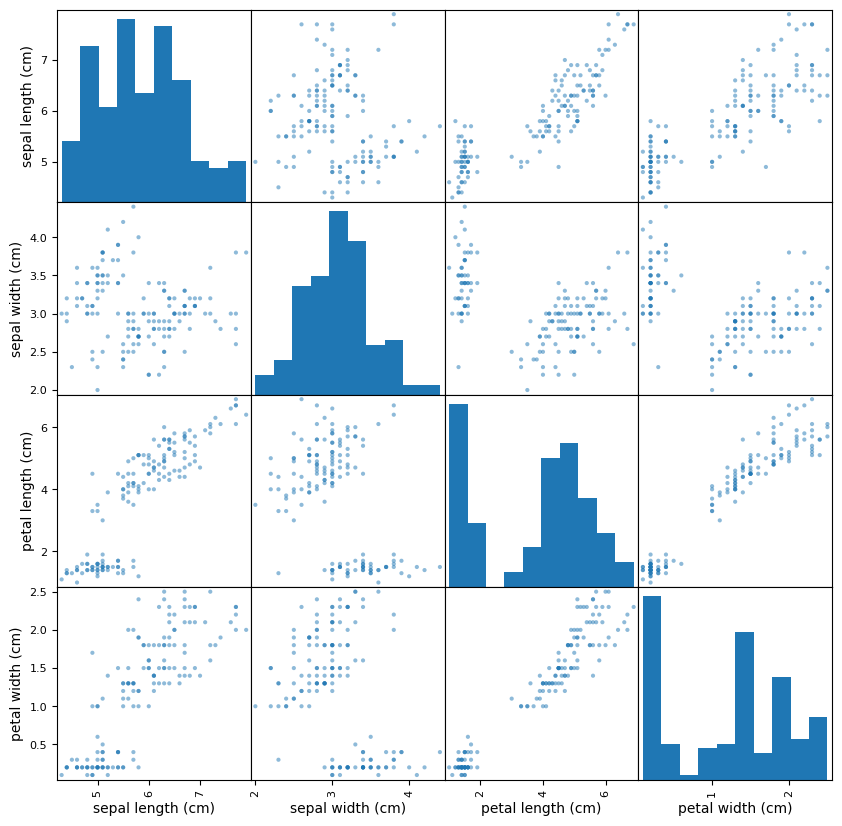

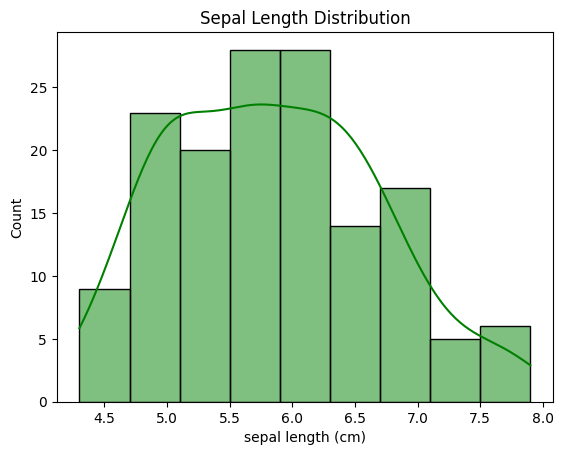

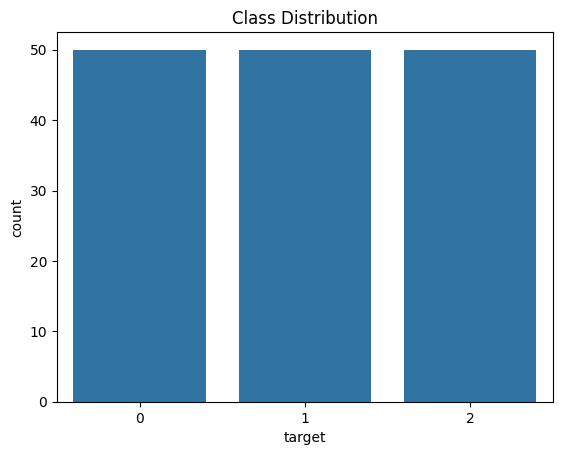

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Scatter matrix
scatter_matrix(iris_df[iris.feature_names], figsize=(10, 10))
plt.show()

# Histogram example
sns.histplot(iris_df['sepal length (cm)'], kde=True, color='green')
plt.title('Sepal Length Distribution')
plt.show()

# Count plot for target classes
sns.countplot(x='target', data=iris_df)
plt.title('Class Distribution')
plt.show()

##
Reflection 2.1:

1. Patterns: Petal measurements strongly separate classes.
2. Potential predictors: All four numeric features.
3. Class imbalance: Balanced across 3 classes.


## 
2.2 Handle Missing Values and Clean Data
No missing values in Iris dataset; no cleaning required.

## 
Reflection 2.2:Dataset is clean and ready for modeling.

##
2.3 Feature Engineering
No additional features needed; existing numeric features are predictive.

##
Reflection 2.3:

1. All features are already numeric, no encoding required.
2. Feature scaling could improve model performance if needed.

## 3. Feature Selection and Justification
3.1 Choose Features and Target

In [3]:
X = iris_df[iris.feature_names]
y = iris_df['target']


##
Reflection 3:

1. Features selected: sepal length, sepal width, petal length, petal width
2. Target: target (multiclass)
3. All selected features are likely highly predictive of class

## 4. Splitting Data
4.1 Stratified Train/Test Split

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx, test_idx in splitter.split(X, y):
    train_set = X.iloc[train_idx]
    test_set = X.iloc[test_idx]

print("Train size:", len(train_set))
print("Test size:", len(test_set))
print("Original class distribution:\n", y.value_counts(normalize=True))
print("Train set class distribution:\n", y.iloc[train_idx].value_counts(normalize=True))
print("Test set class distribution:\n", y.iloc[test_idx].value_counts(normalize=True))


Train size: 120
Test size: 30
Original class distribution:
 target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64
Train set class distribution:
 target
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64
Test set class distribution:
 target
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64


## 
Reflection 4:

1. Stratification ensures class balance in train/test sets.
2. Training and test distributions closely match the original dataset.
3. This improves model evaluation and generalization.